## Take grayscale image of size 512x512, add some salt & pepper noise and perform the following operations –

In [135]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2

### Load the image

Shape of the image: (688, 688)


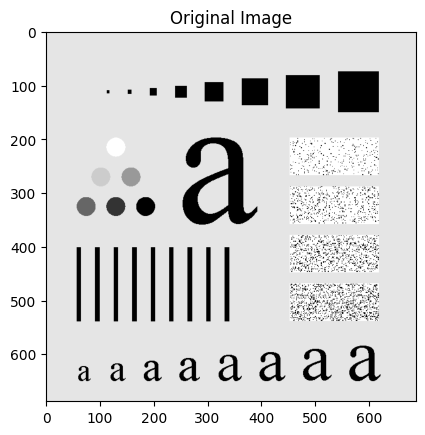

The min pixel vintensity: 0
The max pixel vintensity: 255


In [136]:
original_image = cv2.imread("images/Characters_Test_Pattern.tif", cv2.IMREAD_GRAYSCALE)
print(f"Shape of the image: {original_image.shape}")
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.show()

print(f"The min pixel vintensity: {np.min(original_image)}")
print(f"The max pixel vintensity: {np.max(original_image)}")

In [137]:
def cal_psnr(actual_image, distorted_image):
    actual_image = np.float64(actual_image)
    distorted_image = np.float64(distorted_image)
    mse = np.mean((actual_image - distorted_image) ** 2)
    if mse == 0 :
        mse = int('inf')
    max_pixel = 255.0 
    psnr_value = 10*np.log10((max_pixel * max_pixel) / (mse))

    return psnr_value     

### Function for salt(white pixel) and pepper(black pixel) noise

In [138]:
def add_salt_and_pepper_noise(image, prob):
    noisy_image = image.copy()
    rows, cols = image.shape 

    # Add salt noise (white pixels)
    num_salt = int (prob * rows * cols / 2)
    salts_coords = [np.random.randint(0, rows, num_salt), np.random.randint(0, cols, num_salt)]
    noisy_image[salts_coords[0], salts_coords [1]] = 255 

     # Add salt noise (white pixels)
    num_peeper = int (prob * rows * cols / 2)
    salts_coords = [np.random.randint(0, rows, num_salt), np.random.randint(0, cols, num_salt)]
    noisy_image[salts_coords[0], salts_coords [1]] = 0

    return noisy_image     

### Function for Averaging Filter

In [139]:
def averaging_filter(image, mask_size):
    height, width = image.shape
    pad = mask_size // 2

    # Pad the image with zeros (or you can choose 'reflect', 'edge', etc.)
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(height):
        for j in range(width):
            # Extract the neighborhood
            neighborhood = padded_image[i:i+mask_size, j:j+mask_size]
            # Compute average
            filtered_image[i, j] = np.mean(neighborhood)

    # Convert to uint8 safely
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image.astype(np.uint8)          

### Function for Median Filter

In [140]:
def median_filter(image, mask_size):
    height, width = image.shape
    pad = mask_size // 2

    # Pad the image with zeros (or you can choose 'reflect', 'edge', etc.)
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(height):
        for j in range(width):
            # Extract the neighborhood
            neighborhood = padded_image[i:i+mask_size, j:j+mask_size]
            # Compute average
            filtered_image[i, j] = np.median(neighborhood)

    # Convert to uint8 safely
    filtered_image = np.clip(filtered_image, 0, 255)
    return filtered_image.astype(np.uint8)             

            

### Adding 25% salt and 25% pepper noise

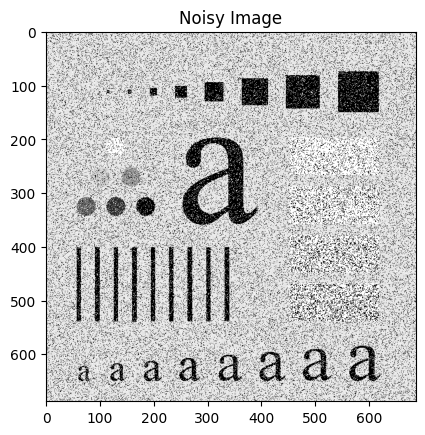

PSNR = 10.062980849032703 dB


In [141]:
noisy_probability = 0.25 
noisy_image = add_salt_and_pepper_noise(original_image, noisy_probability)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

psnr = cal_psnr(original_image, noisy_image)
print(f"PSNR = {psnr} dB")

### Applying Averaging Filter

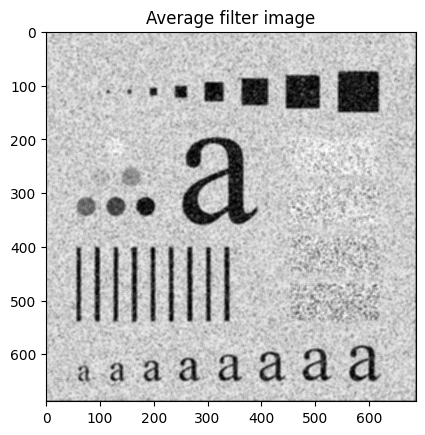

PSNR = 15.38327610675995 dB


In [142]:
averaging_filter_image = averaging_filter(noisy_image,5)

plt.imshow(averaging_filter_image, cmap='gray')
plt.title('Average filter image')
plt.show()

psnr = cal_psnr(original_image, averaging_filter_image)
print(f"PSNR = {psnr} dB")



### Applying Median Filter

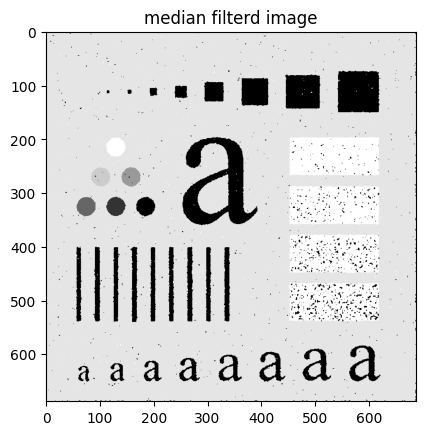

PSNR = 18.068372910808943 dB


In [143]:
median_filtered_image = median_filter(noisy_image, 3)

plt.imshow(median_filtered_image, cmap='gray')
plt.title("median filterd image")
plt.show()

psnr = cal_psnr(original_image, median_filtered_image)
print(f"PSNR = {psnr} dB")

## Loading the noisy image

The shape of the image is: (440, 455)


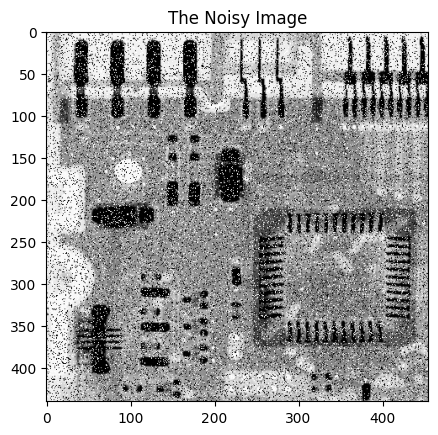

Min pixel intensity : 0
max mixel intensity : 255


In [144]:
noisy_image2 = cv2.imread("images/Noisy_PCB.tif", 0)
print(f"The shape of the image is: {noisy_image2.shape}")
plt.imshow(noisy_image2, cmap='gray')
plt.title("The Noisy Image")
plt.show()

print(f"Min pixel intensity : {np.min(noisy_image2)}")
print(f"max mixel intensity : {np.max(noisy_image2)}")

### Applying Averaging Filter

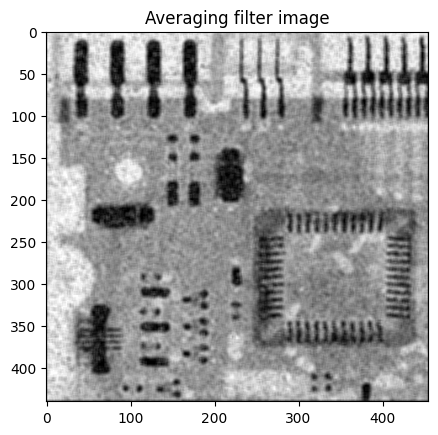

The PSNR is = 11.9646807546449 dB


In [145]:
averaging_filtered_image2 = averaging_filter(noisy_image2, 5)
plt.imshow(averaging_filtered_image2, cmap='gray')
plt.title("Averaging filter image")
plt.show()

psnr = cal_psnr(noisy_image2, averaging_filtered_image2)
print(f"The PSNR is = {psnr} dB")

### Applying Median Filter

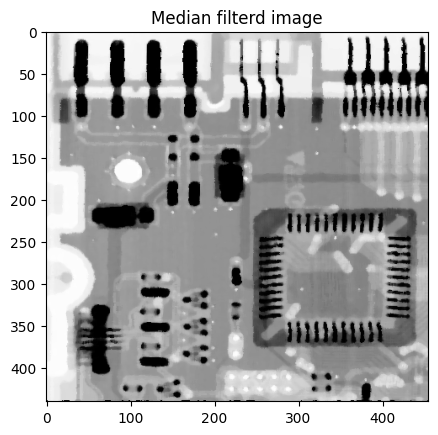

The PSNR of the image with median filter is =11.770727276056537


In [146]:
median_filtered_image2 =  median_filter(noisy_image2, 5)

plt.imshow(median_filtered_image2, cmap= 'gray')
plt.title('Median filterd image')
plt.show()

psnr = cal_psnr(noisy_image2, median_filtered_image2)
print(f"The PSNR of the image with median filter is ={psnr}")

### (b) Use different size of mask (3x3, 5x5, 7x7) with average filter for noise suppression and observe their performance in term of PSNR

Mask size 3x3 → PSNR = 12.47 dB
Mask size 5x5 → PSNR = 11.96 dB
Mask size 7x7 → PSNR = 11.70 dB


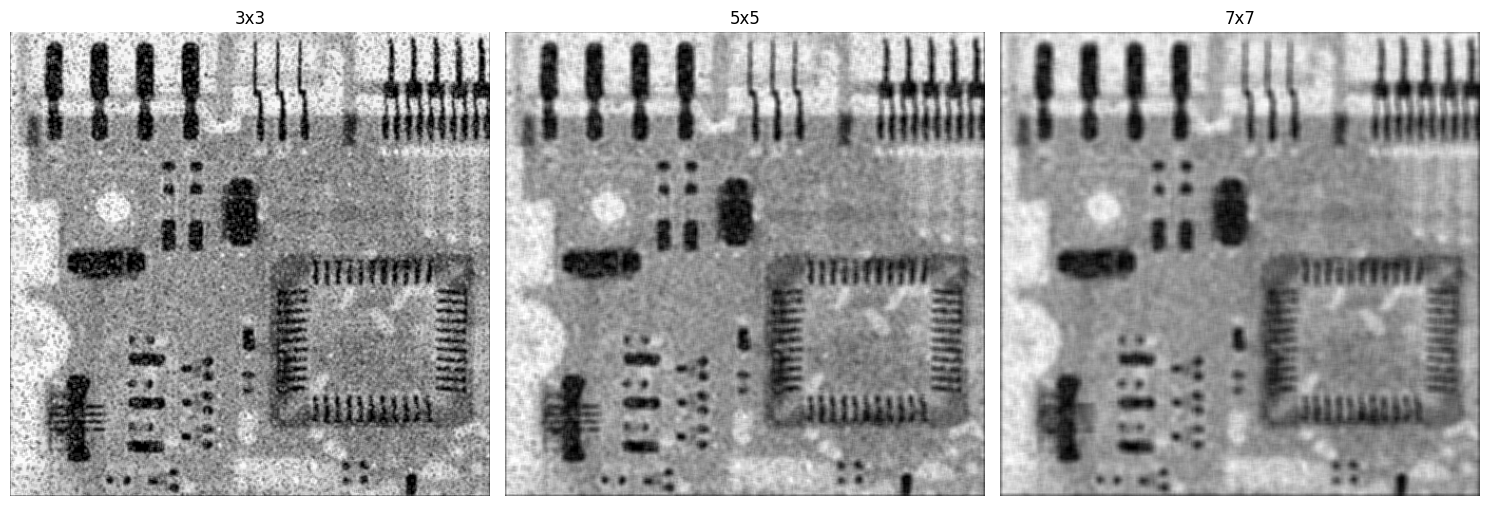

In [147]:
plt.figure(figsize=(15, 5))  # adjust width as needed
index = 1  # subplot index

for mask_size in range(3, 8, 2):  # 3x3, 5x5, 7x7
    average_filtering_image = averaging_filter(noisy_image2, mask_size)
    
    plt.subplot(1, 3, index)
    plt.imshow(average_filtering_image, cmap='gray')
    plt.title(f"{mask_size}x{mask_size}")
    plt.axis('off')
    
    psnr_val = cal_psnr(noisy_image2, average_filtering_image)
    print(f"Mask size {mask_size}x{mask_size} → PSNR = {psnr_val:.2f} dB")
    
    index += 1

plt.tight_layout()
plt.show()

### (c)Take a grayscale image of size 512x512, apply harmonic & geometric mean filter on the noisy image & compare their performance with PSNR

### Harmonic Mean Filter

In [160]:
#The Harmonic Mean Filter works well for salt noise, but fails for pepper noise
def harmonic_filter(image , mask_size):
    image = np.asarray(image /255, dtype=np.float64)

    height, width = image.shape 
    pad = mask_size // 2

    # Pad the image with zeros
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(height):
        for j in range(width):
            neighbourhood = padded_image[i:i+mask_size, j:j+mask_size]
            inverse = 1.0 / (neighbourhood + 1e-4)
            harmonic_mean = (mask_size * mask_size) / np.sum(inverse)
            filtered_image[i, j] = harmonic_mean

    filtered_image = np.clip(filtered_image*255, 0, 255)
    return filtered_image.astype(np.uint8)



### Function for Geometric Mean Filter

In [161]:
def geometric_mean (image, mask_size):
    image = np.asarray(image / 255, dtype=np.float64)
    height, width = image.shape 
    pad = mask_size // 2

    # Pad the image with zeros (or you can choose 'reflect', 'edge', etc.)
    padded_image = np.pad(image, pad_width=pad, mode='constant', constant_values='0')
    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(height):
        for j in range(width):
            neibourhood = padded_image[i : i+mask_size, j : j+ mask_size]
            neibourhood = neibourhood + (1e-4)
            filtered_image[i,j] = np.prod(neibourhood) ** (1 / (mask_size* mask_size))


    filtered_image = np.clip(filtered_image * 255, 0, 255)
    return filtered_image.astype(np.uint8)        

### Applying Harmonic Mean Filter


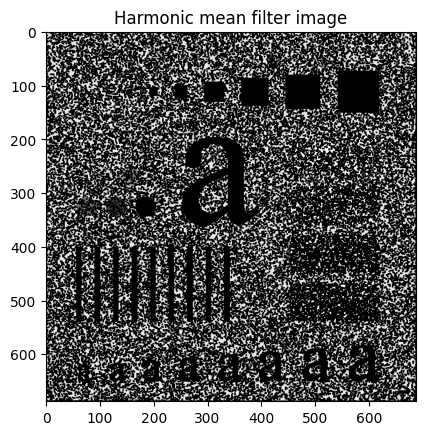

PSNR = 3.4591099618522767 dB


In [162]:
harmonic_mean_filtered_image = harmonic_filter(noisy_image, 3 )

plt.imshow(harmonic_mean_filtered_image, cmap='gray')
plt.title("Harmonic mean filter image")
plt.show()

psnr = cal_psnr(noisy_image, harmonic_mean_filtered_image)
print(f"PSNR = {psnr} dB")

### Applying geometric mean filter

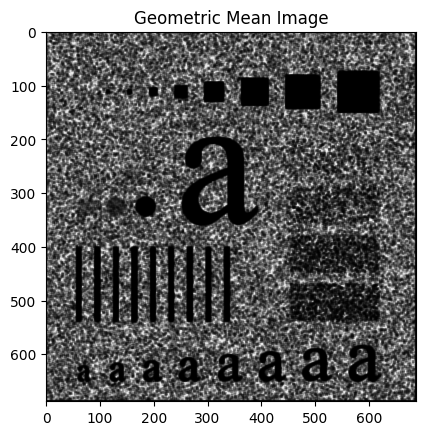

PSNR = 5.008954055408354 dB


In [163]:
geometric_mean_filtered_image = geometric_mean(noisy_image, 5)

plt.imshow(geometric_mean_filtered_image, cmap='gray')
plt.title("Geometric Mean Image")
plt.show()

psnr = cal_psnr(noisy_image, geometric_mean_filtered_image)
print(f"PSNR = {psnr} dB")
